Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

In [2]:
import pandas as pd
df=pd.read_csv("diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
import numpy as np
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [7]:
df['gender']=df['gender'].map({"Female":1,"Male":2,"Others":3})

In [8]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [9]:
df['smoking_history']=df['smoking_history'].map({"never":0,"No Info":1,"current":2,"former":3,"ever":4,"not current":5})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               99982 non-null   float64
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 6.9 MB


In [11]:
df.isnull().sum()

gender                 18
age                     0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
HbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64

In [12]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,80.0,0,1,0,25.19,6.6,140,0
1,1.0,54.0,0,0,1,27.32,6.6,80,0
2,2.0,28.0,0,0,0,27.32,5.7,158,0
3,1.0,36.0,0,0,2,23.45,5.0,155,0
4,2.0,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,1.0,80.0,0,0,1,27.32,6.2,90,0
99996,1.0,2.0,0,0,1,17.37,6.5,100,0
99997,2.0,66.0,0,0,3,27.83,5.7,155,0
99998,1.0,24.0,0,0,0,35.42,4.0,100,0


In [13]:
#gender is a necessary column. thus we cannot omit it. 
#hence cleaning the column gender
#we assign a aplaceholder value "unknown" to represent
#the missing values

df['gender'].fillna('Unknown', inplace=True)

In [14]:
df.isnull().sum()

# now there are no missing values in the dataset

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [15]:
minage=df['age'].min()
dres1 = df.loc[df['age'] == minage, 'diabetes'].iloc[0]
maxage=df['age'].max()
dres2 = df.loc[df['age'] == minage, 'diabetes'].iloc[0]

print("0 - Negative")
print("1 - Positive")
print("\n")
print("The patient with the minimum age is ",minage," and his diabetes result is ",dres1)
print("The patient with the maximum age is ",maxage," and his diabetes result is ",dres2)

0 - Negative
1 - Positive


The patient with the minimum age is  0.08  and his diabetes result is  0
The patient with the maximum age is  80.0  and his diabetes result is  0


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

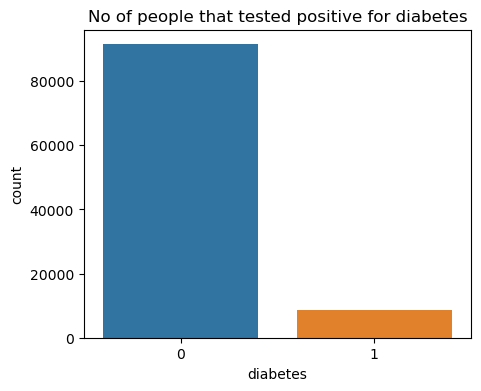

In [17]:
plt.figure(figsize=(5,4))
sns.countplot(x='diabetes',data = df)
plt.title("No of people that tested positive for diabetes")
plt.show()

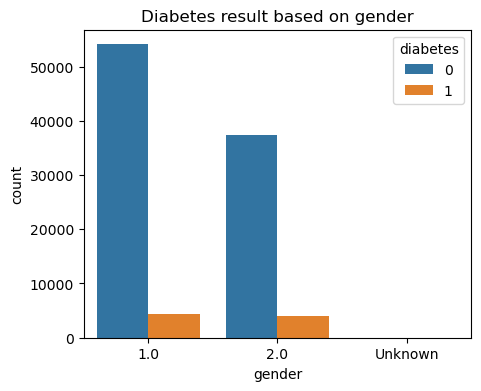

In [18]:
plt.figure(figsize=(5,4))
sns.countplot(x='gender',hue='diabetes',data=df)
plt.title('Diabetes result based on gender')
plt.show()

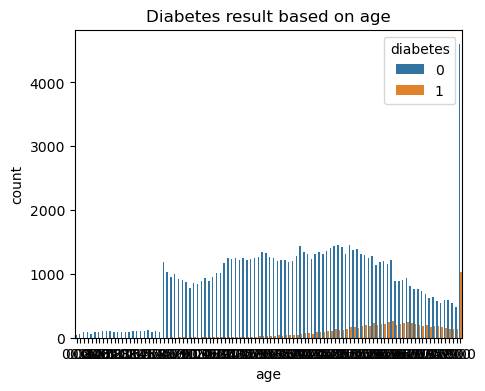

In [19]:
plt.figure(figsize=(5,4))
sns.countplot(x='age',hue='diabetes',data=df)
plt.title('Diabetes result based on age')
plt.show()

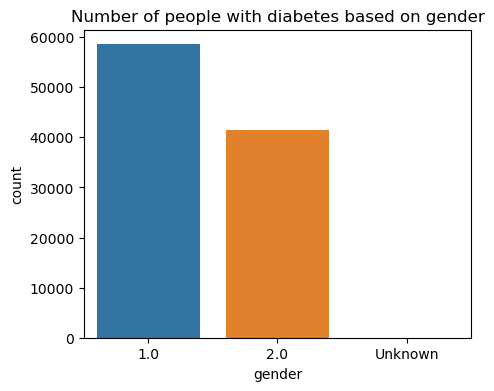

In [20]:
plt.figure(figsize=(5,4))
sns.countplot(x='gender',data=df)
plt.title('Number of people with diabetes based on gender')
plt.show()

In [22]:
#checking for diabetes by gender

df[['gender','diabetes']].groupby(by='gender').agg(['mean','count'])

diabetes       
             mean  count
gender                  
1.0      0.076189  58552
2.0      0.097490  41430
Unknown  0.000000     18

Feature - Hypertension

In [23]:
# Proportion for hypertension
df['hypertension'].value_counts(normalize=True)

hypertension
0    0.92515
1    0.07485
Name: proportion, dtype: float64

In [24]:
# Checking the diabetes mean and count for hypertension
df[['hypertension','diabetes']].groupby(by='hypertension').agg(['mean','count'])

diabetes       
                  mean  count
hypertension                 
0             0.069308  92515
1             0.278958   7485

<Axes: xlabel='hypertension', ylabel='count'>

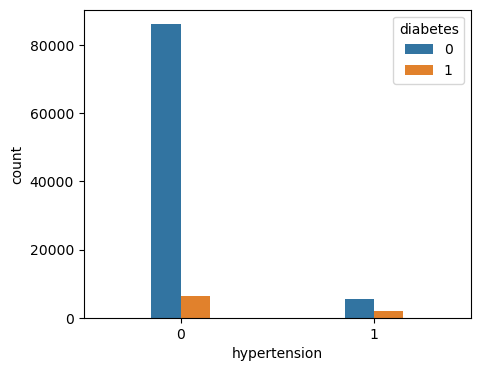

In [25]:
# Plotting hypertension distribution
plt.figure(figsize=(5,4))
sns.countplot(data=df,x='hypertension',width=0.3, hue='diabetes')

Feature - Heart diseases

In [26]:
# Proportion for heart_disease
df['heart_disease'].value_counts(normalize=True)

heart_disease
0    0.96058
1    0.03942
Name: proportion, dtype: float64

In [27]:
# Checking the diabetes mean and count for heart_disease
df[['heart_disease','diabetes']].groupby(by='heart_disease').agg(['mean','count'])

diabetes       
                   mean  count
heart_disease                 
0              0.075298  96058
1              0.321410   3942

<Axes: xlabel='heart_disease', ylabel='count'>

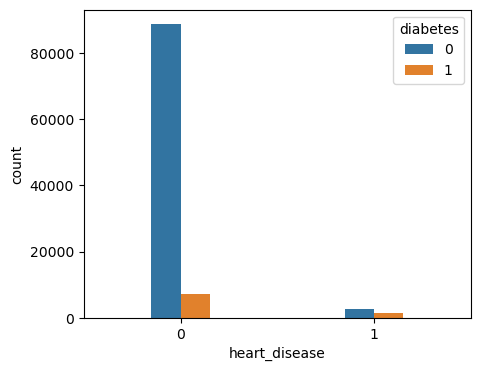

In [28]:
# Plotting hypertension distribution
plt.figure(figsize=(5,4))
sns.countplot(data=df,x='heart_disease',width=0.3, hue='diabetes')

Feature - smoking history

In [29]:
# Proportion for smoking_history
df['smoking_history'].value_counts(normalize=True)

smoking_history
1    0.35816
0    0.35095
3    0.09352
2    0.09286
5    0.06447
4    0.04004
Name: proportion, dtype: float64

In [30]:
# Checking the diabetes mean and count for smoking_history
df[['smoking_history','diabetes']].groupby(by='smoking_history').agg(['mean','count'])

diabetes       
                     mean  count
smoking_history                 
0                0.095341  35095
1                0.040596  35816
2                0.102089   9286
3                0.170017   9352
4                0.117882   4004
5                0.107027   6447

<Axes: xlabel='smoking_history', ylabel='count'>

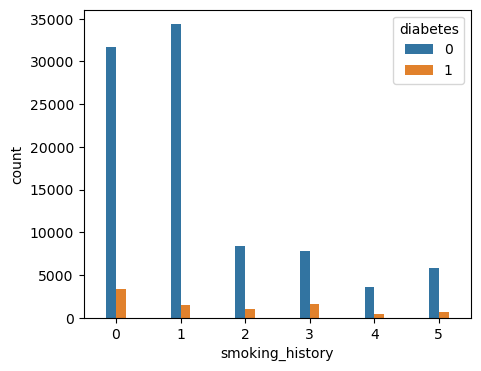

In [31]:
# Plotting smoking_history distribution
plt.figure(figsize=(5,4))
sns.countplot(data=df,x='smoking_history',width=0.3, hue='diabetes')

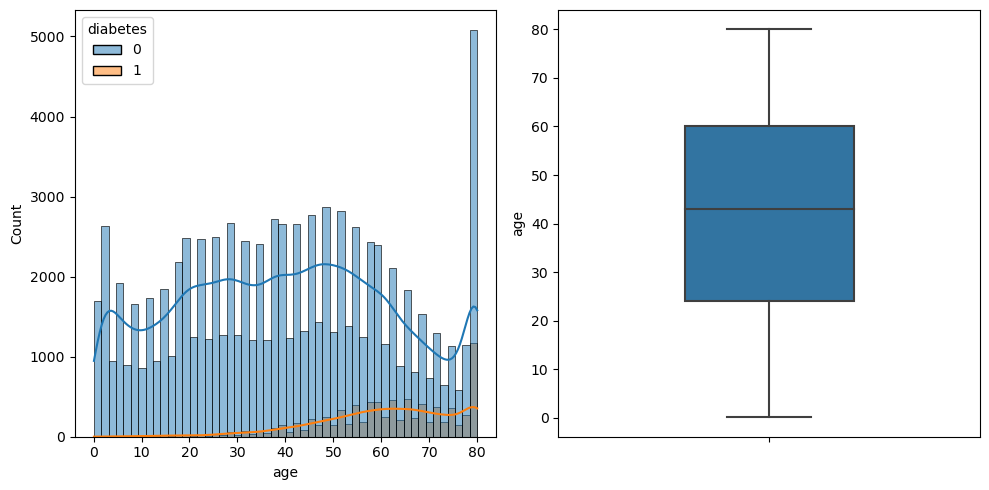

In [35]:
#plotting age

fig, ax = plt.subplots(figsize=(10,5),nrows=1, ncols=2)
sns.histplot(data=df,x='age', hue='diabetes',ax=ax[0],kde=True)
sns.boxplot(data=df, y='age', hue='diabetes', ax=ax[1], width=0.4)
plt.tight_layout()
plt.show()

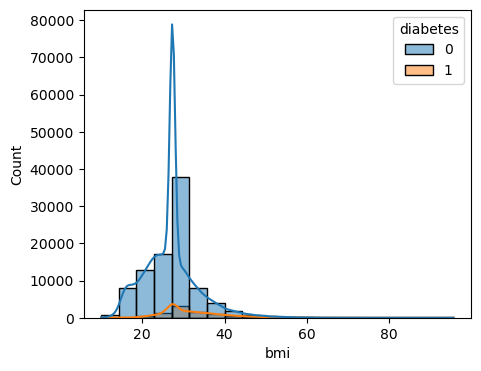

In [36]:
# Plotting bmi distribution

fig = plt.subplots(figsize=(5,4))
sns.histplot(data=df,x='bmi', hue='diabetes',kde=True,bins=20)

plt.show()

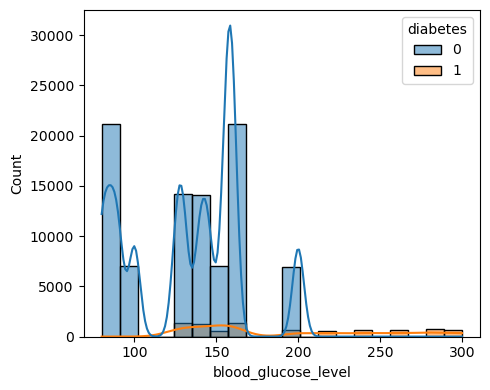

In [37]:
# Plotting blood_glucose_level distribution
fig = plt.subplots(figsize=(5,4))
sns.histplot(data=df,x='blood_glucose_level', hue='diabetes',kde=True,bins=20)

plt.tight_layout()
plt.show()

Correlation matrix

In [39]:
# Categorical features
cat_features = ['gender','smoking_history']

# Binary features
bin_features = ['hypertension','heart_disease']

num_features = df.drop(columns=cat_features + bin_features + ['diabetes']).columns.tolist()
# Dataframe with numerical features
df_num_features = df[num_features + ['diabetes']]

# Dataframe with binary features
df_bin_features = df[bin_features]

# Using pandas get_dummies method for the categorical variables
df_cat_features_encoded = pd.concat([pd.get_dummies(df[cat_feature],prefix=cat_feature) for cat_feature in df.drop(columns=num_features+bin_features+['diabetes']).columns.tolist()],axis=1)

# Concatenating all dataframes
df_all_features = pd.concat([df_num_features, df_bin_features, df_cat_features_encoded], axis=1)

df_all_features.head()


,age,bmi,HbA1c_level,blood_glucose_level,diabetes,hypertension,heart_disease,gender_1.0,gender_2.0,gender_Unknown,smoking_history_0,smoking_history_1,smoking_history_2,smoking_history_3,smoking_history_4,smoking_history_5
0,80.0,25.19,6.6,140,0,0,1,True,False,False,True,False,False,False,False,False
1,54.0,27.32,6.6,80,0,0,0,True,False,False,False,True,False,False,False,False
2,28.0,27.32,5.7,158,0,0,0,False,True,False,True,False,False,False,False,False
3,36.0,23.45,5.0,155,0,0,0,True,False,False,False,False,True,False,False,False
4,76.0,20.14,4.8,155,0,1,1,False,True,False,False,False,True,False,False,False


<Axes: >

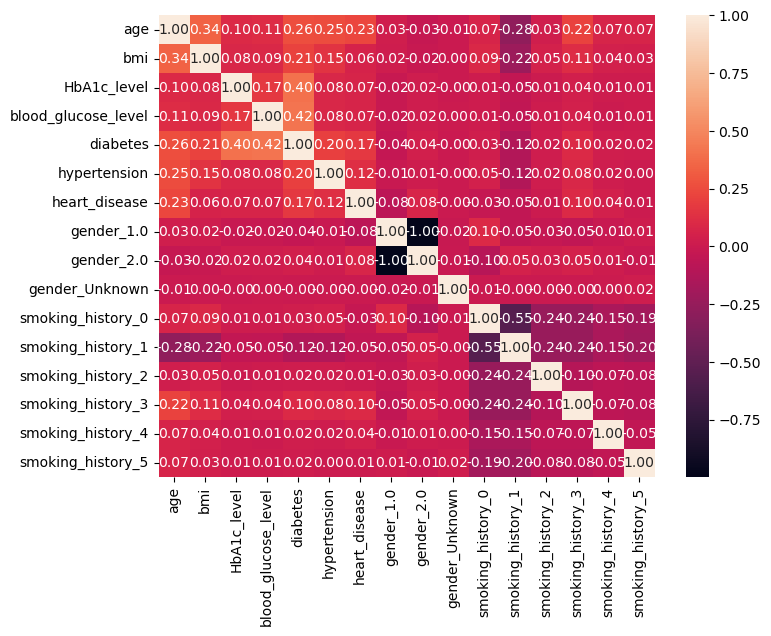

In [44]:
correlation_matrix = df_all_features.corr()
plt.figure(figsize=(8,6))
sns.heatmap(data=correlation_matrix, annot=True, fmt='.2f')